## 20. Модель Гаусса-Маркова простой линейной регрессии. Проверка значимости регрессии, изменение модели и прогноз новых згачений.

### Пример.

Данные потребления хлеба на производство спирта.

In [2]:
x<-c(46.2, 43.4, 37.8, 42.0, 44.8)
y<-c(  33,   31,   27,   30,   32)

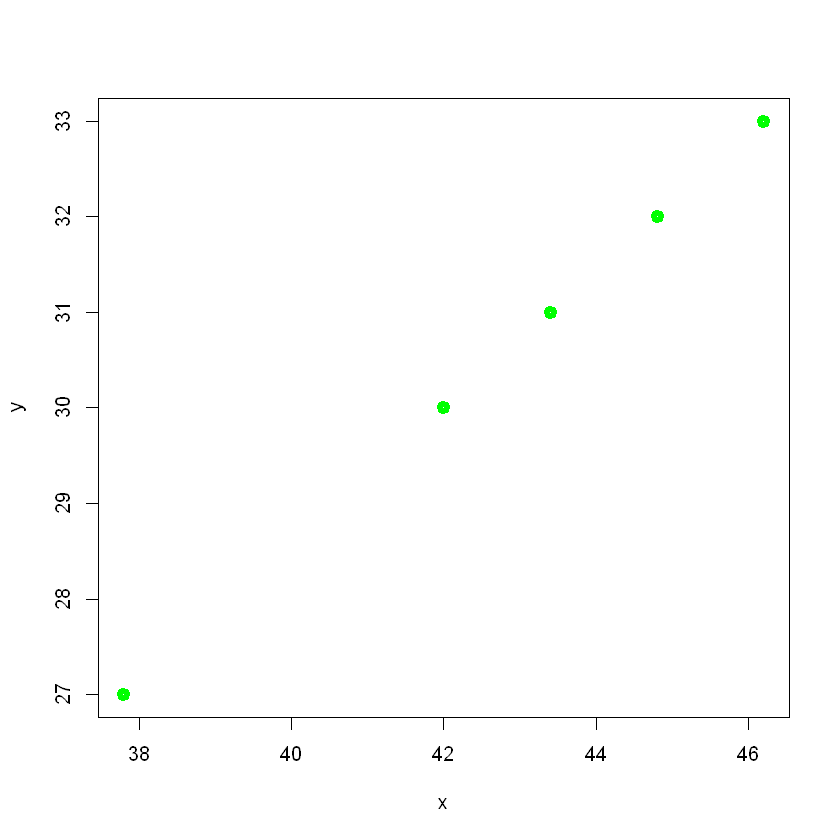

In [4]:
plot(x,y, col = 'green', lwd = 5)

Из графика видно, что зависимость между данными линейными.

In [17]:
lm(y~x)->y.lm1
y.lm1


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
  1.907e-14    7.143e-01  


Оценка свободного коэффициента отлична от нуля, но это не должно быть так, потому что если взять 0 ресурсов хлеба, то произвести можно только 0 продукции спирта.

Значит нужно как-то изменить модель.

In [18]:
summary(y.lm1)

Warning message in summary.lm(y.lm1):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = y ~ x)

Residuals:
         1          2          3          4          5 
-2.003e-15  7.766e-16 -2.821e-16 -6.845e-16  2.193e-15 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 1.907e-14  1.214e-14 1.570e+00    0.214    
x           7.143e-01  2.828e-16 2.525e+15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.823e-15 on 3 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 6.378e+30 on 1 and 3 DF,  p-value: < 2.2e-16


Видно, что свободный коэффициент не является значимым.

Анализ остатков показывает, что они обладают нормальностью.


	Shapiro-Wilk normality test

data:  resid(y.lm1)
W = 0.98961, p-value = 0.9783


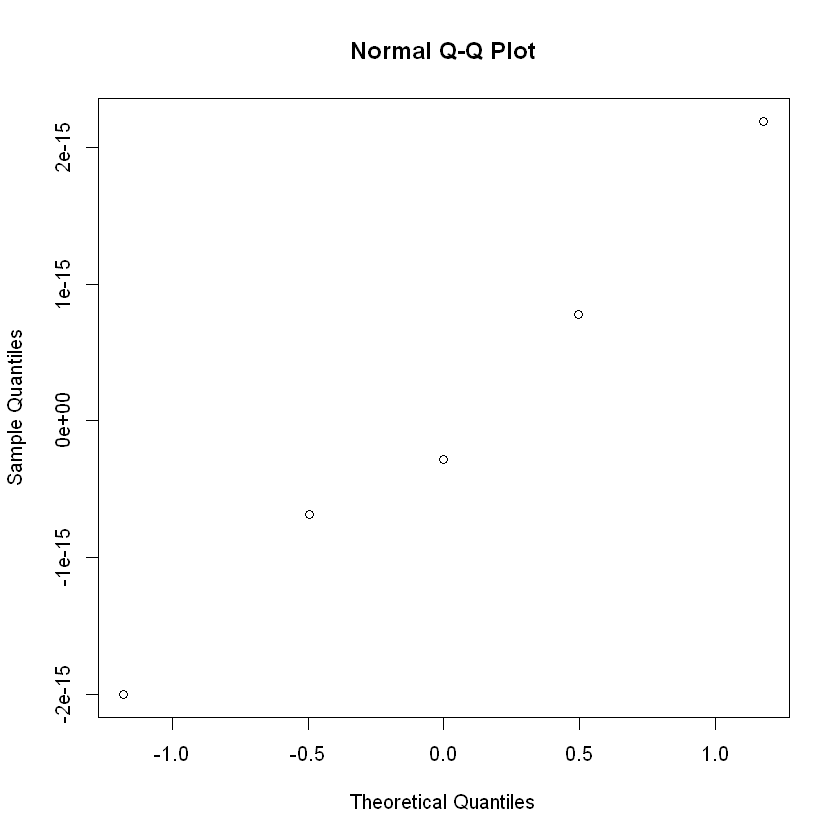

In [22]:
shapiro.test(resid(y.lm1))
qqnorm(resid(y.lm1))

Немного изменим модель, сдвинув ее на `-1`

In [19]:
y.lm2<-y.lm1

In [23]:
update(y.lm2, .~-1+.)->y.lm3
y.lm3


Call:
lm(formula = y ~ x - 1)

Coefficients:
     x  
0.7143  


Свободный коэффициент равен `нулю`, этого мы и добивались

In [21]:
summary(y.lm3)

Warning message in summary.lm(y.lm3):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = y ~ x - 1)

Residuals:
         1          2          3          4          5 
-1.865e-14  4.967e-15  5.701e-15  5.150e-15  4.783e-15 

Coefficients:
   Estimate Std. Error   t value Pr(>|t|)    
x 7.143e-01  1.110e-16 6.434e+15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.066e-14 on 4 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 4.14e+31 on 1 and 4 DF,  p-value: < 2.2e-16


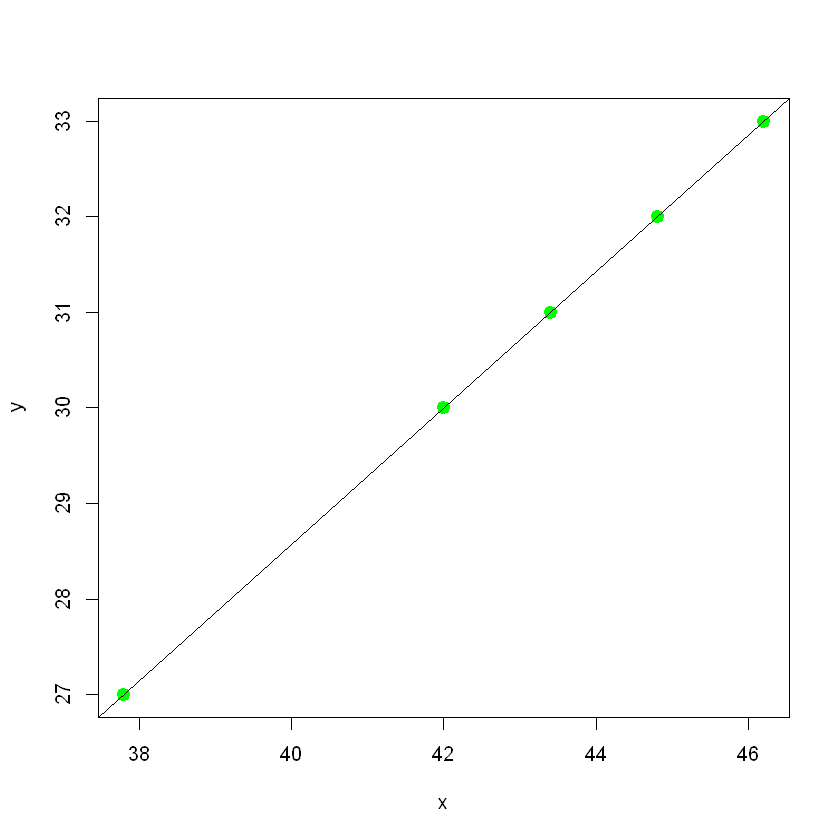

In [15]:
plot(x,y, col = 'green', lwd = 5)
abline(y.lm3)

In [24]:
predict(y.lm3, list(x=c(39, 41)))

1        2 
27.85714 29.28571